In [1]:
from sklearn.datasets import fetch_20newsgroups, fetch_mldata
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from numpy import linalg as LA
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train', data_home='../ata/')
newsgroups_test = fetch_20newsgroups(subset='test', data_home='../data/')

vectortype_train = TfidfVectorizer(stop_words='english')
vectortype_test = TfidfVectorizer(stop_words='english')

news_vectored_result_train = vectortype_train.fit_transform(newsgroups_train.data)
news_vectored_result_test = vectortype_test.fit_transform(newsgroups_test.data)

news_train_target = newsgroups_train.target
news_train_target_names = newsgroups_train.target_names
news_test_target = newsgroups_test.target


train_features = vectortype_train.get_feature_names()
test_features = vectortype_test.get_feature_names()
common_features = np.intersect1d(train_features, test_features)

train_feature_final = np.searchsorted(train_features, common_features)
news_vt_train = news_vectored_result_train[:,train_feature_final]

test_feature_final = np.searchsorted(test_features, common_features)
news_vt_test = news_vectored_result_test[:,test_feature_final]

In [3]:
mnist_full = fetch_mldata('MNIST original', data_home='../data/')
mnist_data = mnist_full.data
mnist_target = mnist_full.target
mnist_train, mnist_test, mnist_train_target, mnist_test_target = train_test_split(mnist_full.data, mnist_full.target, test_size=0.2)

In [4]:
spam_file = open("../data/spambase.data")
spam_list = []
spam_target = []
spam_col = []
for line in spam_file.readlines():
    line = line.split(',')
    line = [float(x) for x in line]
    spam_list.append(line[:-1])
    spam_target.append(line[-1])
spam_data = np.array(spam_list)
spam_train, spam_test, spam_train_target, spam_test_target = train_test_split(spam_data, spam_target, test_size=0.2)
spam_col_file = open("../data/spambase.names")
for line in spam_col_file.readlines()[33:]:
    spam_col.append(line.split(':')[0])

In [5]:
lr_news = LogisticRegression()
lr_news.fit(news_vt_train, y=news_train_target)
l=[]
for j in range(20):
    l.append([common_features[i] for i in np.fliplr(np.argsort(np.absolute(lr_news.coef_)))[j, :30]])
for item in range(len(l)):
    print(item, '. ', news_train_target_names[item], ':\n', l[item])
    print("\n")

0 .  alt.atheism :
 ['keith', 'atheism', 'atheists', 'islamic', 'caltech', 'okcforum', 'god', 'islam', 'mathew', 'jaeger', 'livesey', 'rushdie', 'mangoe', 'benedikt', 'umd', 'religion', 'osrhe', 'wingate', 'edu', 'kmr4', 'sgi', 'bible', 'cobb', 'mantis', 'gregg', 'tek', 'solntze', 'atheist', 'bobby', 'ico']


1 .  comp.graphics :
 ['graphics', 'image', '3d', 'polygon', 'tiff', 'images', 'files', 'pov', '3do', 'format', 'points', 'animation', 'package', 'gif', 'vga', 'sphere', 'color', 'vesa', 'surface', 'algorithm', 'program', 'file', '42', 'looking', 'library', 'people', 'code', 'software', 'quicktime', 'xv']


2 .  comp.os.ms-windows.misc :
 ['windows', 'file', 'ax', 'driver', 'drivers', 'files', 'cica', 'dos', 'win', 'nt', 'risc', 'ini', 'mouse', 'ms', 'win3', 'fonts', 'ftp', 'font', 'printer', 'access', 'microsoft', 'using', 'bmp', 'tw', 'program', 'card', 'manager', 'diamond', 'norton', 'deskjet']


3 .  comp.sys.ibm.pc.hardware :
 ['drive', 'card', 'pc', 'scsi', 'bus', 'ide', 'ga

In [6]:
news_predict = lr_news.predict(news_vt_test)
accuracy_score(news_test_target, news_predict)

0.8275358470525757

In [9]:
lr_mnist = LogisticRegression(multi_class='multinomial', C=0.1, tol=0.1, solver='saga')
lr_mnist.fit(mnist_train, mnist_train_target)
np.fliplr(np.argsort(np.absolute(lr_mnist.coef_)))[:, :30]

array([[379, 407, 434, 435, 408, 462, 378, 461, 406, 323, 380, 489, 351,
        490, 352, 350, 517, 433, 324, 518, 514, 436, 360, 387, 359, 416,
        415, 463, 571, 388],
       [350, 378, 434, 406, 322, 295, 465, 323, 462, 351, 402, 375, 374,
        438, 466, 403, 294, 379, 410, 433, 493, 621, 510, 439, 490, 461,
        489, 430, 520, 405],
       [370, 343, 369, 473, 342, 371, 321, 318, 501, 528, 500, 322, 351,
        472, 317, 320, 344, 348, 319, 316, 345, 445, 341, 347, 509, 397,
        346, 527, 554,  97],
       [708, 709, 516, 125, 486, 710, 712, 290, 713, 456, 289, 386, 535,
        711, 291, 124, 292, 678, 384, 316,  96, 317, 679, 122, 385, 517,
        343, 563, 123, 128],
       [294, 348, 322, 463, 266, 375,  97, 347, 321, 409, 742, 376,  96,
         98, 741, 569, 570,  99, 403, 320, 464, 490, 436, 437, 408, 411,
        712, 183, 125, 317],
       [304, 276, 305, 277, 248, 358, 359, 220, 249, 357, 275, 328, 192,
        387, 333, 221, 303, 510, 329, 321, 292, 332,

In [10]:
mnist_predict = lr_mnist.predict(mnist_test)
accuracy_score(mnist_test_target, mnist_predict)

0.9195714285714286

In [11]:
lr_spam = LogisticRegression()
lr_spam.fit(spam_train, spam_train_target)
np.array([spam_col[i] for i in np.fliplr(np.argsort(np.absolute(lr_spam.coef_)))[0, :30]])

array(['word_freq_george', 'char_freq_$', 'word_freq_remove',
       'word_freq_000', 'word_freq_meeting', 'word_freq_cs',
       'word_freq_hp', 'word_freq_conference', 'word_freq_edu',
       'word_freq_project', 'word_freq_lab', 'word_freq_85',
       'word_freq_free', 'char_freq_;', 'char_freq_#', 'word_freq_3d',
       'word_freq_hpl', 'word_freq_credit', 'word_freq_table',
       'word_freq_original', 'word_freq_addresses',
       'word_freq_technology', 'word_freq_data', 'word_freq_business',
       'word_freq_re', 'word_freq_over', 'word_freq_order',
       'word_freq_telnet', 'word_freq_internet', 'word_freq_our'],
      dtype='<U20')

In [12]:
spam_predict = lr_spam.predict(spam_test)
accuracy_score(spam_test_target, spam_predict)

0.9337676438653637

In [13]:
dt_news = DecisionTreeClassifier()
dt_news.fit(news_vt_train, news_train_target)
(np.array([common_features[i] for i in np.flip(np.argsort(np.absolute(dt_news.feature_importances_)), axis=0)]))[:30]

array(['clipper', 'dod', 'sale', 'windows', 'hockey', 'car', 'god',
       'space', 'israel', 'gun', 'baseball', 'turkish', 'bike', 'mac',
       'graphics', 'window', 'nhl', 'rutgers', 'geb', 'atheists',
       'encryption', 'motif', 'article', 'edu', 'orbit', 'com',
       'controller', 'team', 'waco', 'apple'], dtype='<U80')

In [14]:
news_dt_pred = dt_news.predict(news_vt_test)
accuracy_score(news_test_target, news_dt_pred)

0.5690387679235263

In [15]:
dt_mnist = DecisionTreeClassifier()
dt_mnist.fit(mnist_train, mnist_train_target)
np.flip(np.argsort(np.absolute(dt_mnist.feature_importances_)), axis=0)[:30]

array([489, 435, 350, 568, 430, 211, 347, 346, 405,  98, 156, 485, 206,
       290, 487, 456, 486, 154, 656, 101, 657, 243, 515, 381, 267, 348,
       155, 297,  95, 516])

In [16]:
mnist_dt_pred = dt_mnist.predict(mnist_test)
accuracy_score(mnist_test_target, mnist_dt_pred)

0.8744285714285714

In [17]:
dt_spam = DecisionTreeClassifier()
dt_spam.fit(spam_train, spam_train_target)
np.array([spam_col[i] for i in np.flip(np.argsort(np.absolute(dt_spam.feature_importances_)), axis=0)])[:30]

array(['char_freq_!', 'capital_run_length_longest', 'word_freq_remove',
       'char_freq_$', 'word_freq_free', 'word_freq_hp',
       'word_freq_george', 'capital_run_length_average', 'word_freq_edu',
       'capital_run_length_total', 'word_freq_our', 'word_freq_you',
       'word_freq_will', 'word_freq_re', 'word_freq_your', 'char_freq_(',
       'word_freq_650', 'word_freq_meeting', 'word_freq_business',
       'word_freq_1999', 'word_freq_people', 'word_freq_hpl',
       'word_freq_over', 'char_freq_;', 'word_freq_internet',
       'word_freq_conference', 'word_freq_labs', 'word_freq_money',
       'word_freq_receive', 'word_freq_address'], dtype='<U26')

In [18]:
spam_dt_predict = dt_spam.predict(spam_test)
accuracy_score(spam_test_target, spam_dt_predict)

0.9077090119435396

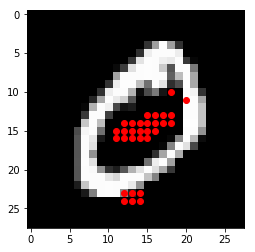

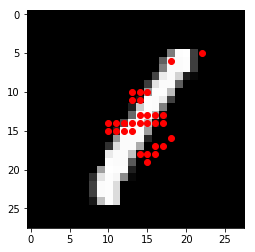

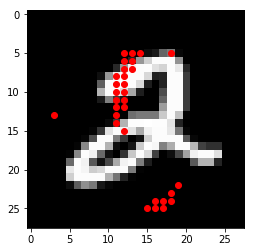

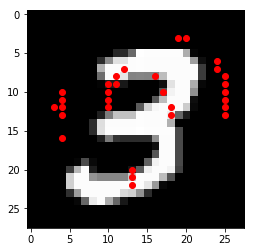

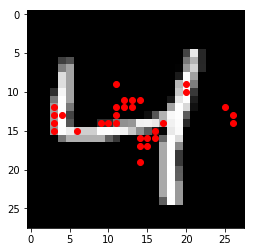

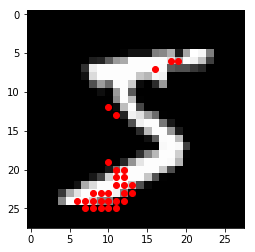

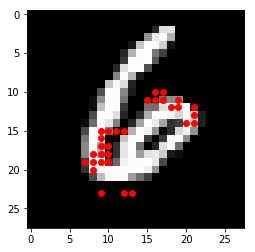

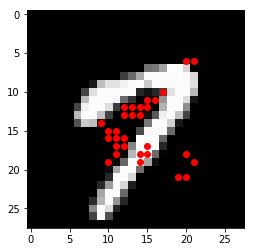

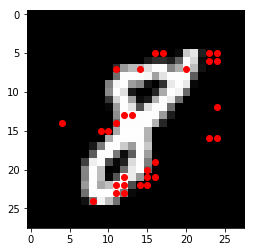

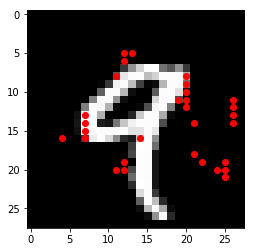

In [77]:
imp_list = np.fliplr(np.argsort(np.absolute(lr_mnist.coef_)))[:, :30]
for i in range(10):
    x = []
    y = []
    for item in imp_list[i]:
        y.append(item%28)
        x.append(math.floor(item/28))
    itemindex = np.where(mnist_target==i)[0][0]
    plt.imshow(mnist_data[itemindex].reshape(28,28), cmap='gray')
    plt.plot(x,y,'ro')
    plt.show()